In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

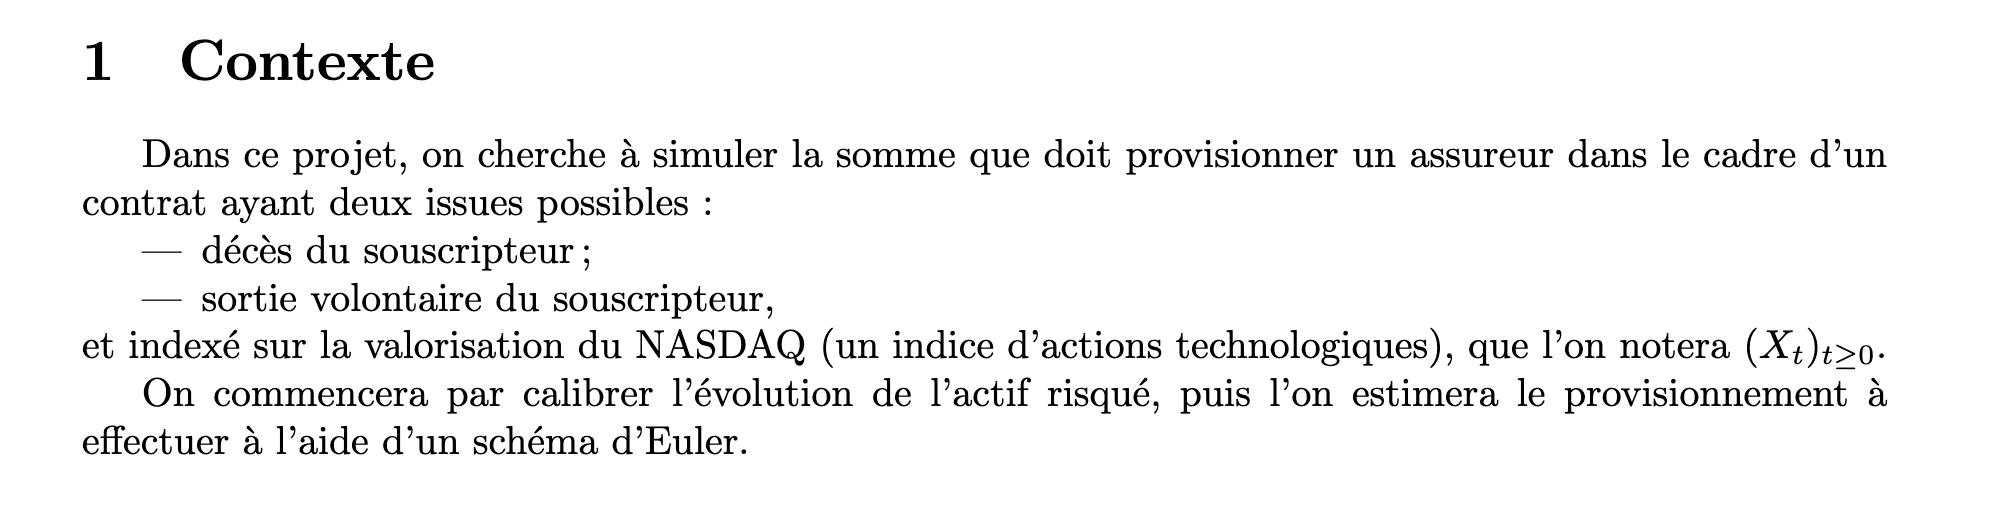

In [3]:
df_ixic = yf.download("^IXIC")
df_ixic.columns=["close","high","low","open","volume"]


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
import requests

url = "https://api.nasdaq.com/api/quote/NDX/option-chain?assetclass=index&limit=1200"

payload = {}
headers = {
  'accept': 'application/json, text/plain, */*',
  'accept-language': 'en-US,en;q=0.7',
  'origin': 'https://www.nasdaq.com',
  'priority': 'u=1, i',
  'referer': 'https://www.nasdaq.com/',
  'sec-ch-ua': '"Brave";v="141", "Not?A_Brand";v="8", "Chromium";v="141"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"macOS"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'cors',
  'sec-fetch-site': 'same-site',
  'sec-gpc': '1',
  'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36'
}

response = requests.request("GET", url, headers=headers, data=payload).json()

In [24]:
df=pd.DataFrame(response["data"]["table"]["rows"])
df_ndx_put_option = df[df["expirygroup"]==""]
df_ndx_put_option

,expirygroup,expiryDate,c_Last,c_Change,c_Bid,c_Ask,c_Volume,c_Openinterest,c_colour,strike,p_Last,p_Change,p_Bid,p_Ask,p_Volume,p_Openinterest,p_colour,drillDownURL
1,,Nov 7,--,--,"2,457.20","2,652.00",--,--,True,"22,625.00",1.30,--,0.20,0.95,--,4,False,/market-activity/index/ndx/option-chain/call-p...
2,,Nov 7,"1,968.10",--,"2,432.20","2,627.00",--,1,True,"22,650.00",2.30,--,0.20,0.95,--,2,False,/market-activity/index/ndx/option-chain/call-p...
3,,Nov 7,--,--,"2,407.30","2,602.10",--,--,True,"22,675.00",7.75,--,0.20,0.95,--,--,False,/market-activity/index/ndx/option-chain/call-p...
4,,Nov 7,--,--,"2,377.10","2,576.90",--,--,True,"22,700.00",0.57,-0.40,0.25,1.00,1,10,False,/market-activity/index/ndx/option-chain/call-p...
5,,Nov 7,--,--,"2,357.30","2,552.10",--,--,True,"22,725.00",0.50,-0.39,0.25,1.00,1,3,False,/market-activity/index/ndx/option-chain/call-p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,,Nov 13,869.10,--,806.30,959.60,1,--,True,"24,400.00",78.97,53.02,87.50,90.40,2,8,False,/market-activity/index/ndx/option-chain/call-p...
1196,,Nov 13,--,--,756.00,827.50,--,--,True,"24,500.00",111.39,81.19,102.80,105.90,2,6,False,/market-activity/index/ndx/option-chain/call-p...
1197,,Nov 13,--,--,690.90,736.60,--,--,True,"24,600.00",146.40,108.00,120.80,124.00,10,13,False,/market-activity/index/ndx/option-chain/call-p...
1198,,Nov 13,--,--,595.10,664.30,--,--,True,"24,700.00",170.20,77.80,141.60,145.00,14,28,False,/market-activity/index/ndx/option-chain/call-p...


In [ ]:
# df_ndx_put_option.to_csv("../data/sujet6/ndx_put_option.csv",index=False)
# df_ixic.to_csv("../data/sujet6/ixic.csv")

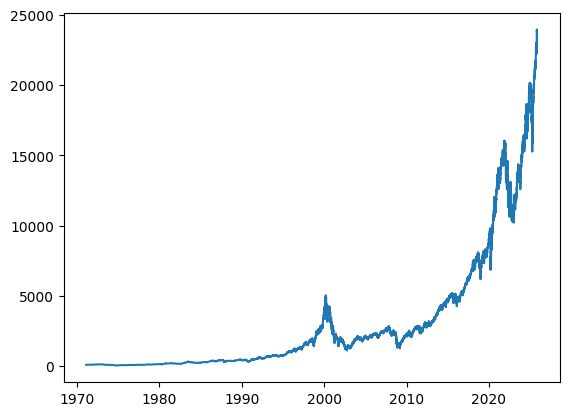

In [27]:
plt.plot(df_ixic["close"])

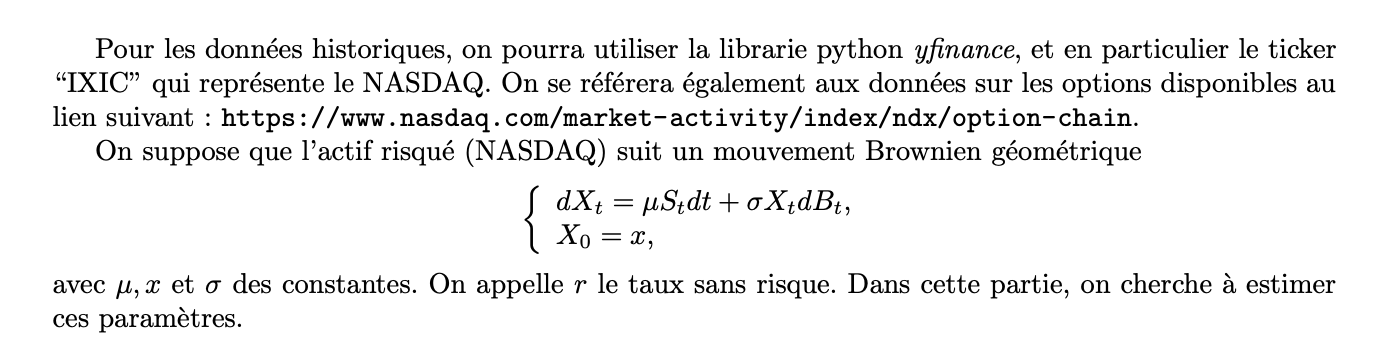

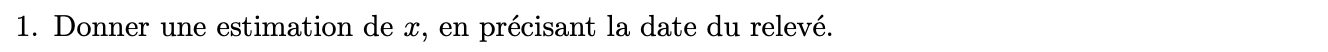

In [9]:
# spot và ngày chốt
spot_date = df_ixic.index[-1]
x = float(df_ixic["close"].iloc[-1])
spot_date, x


(Timestamp('2025-11-06 00:00:00'), 23053.9921875)

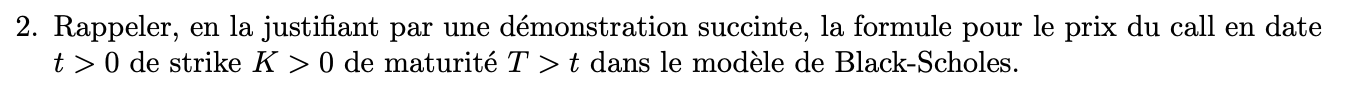

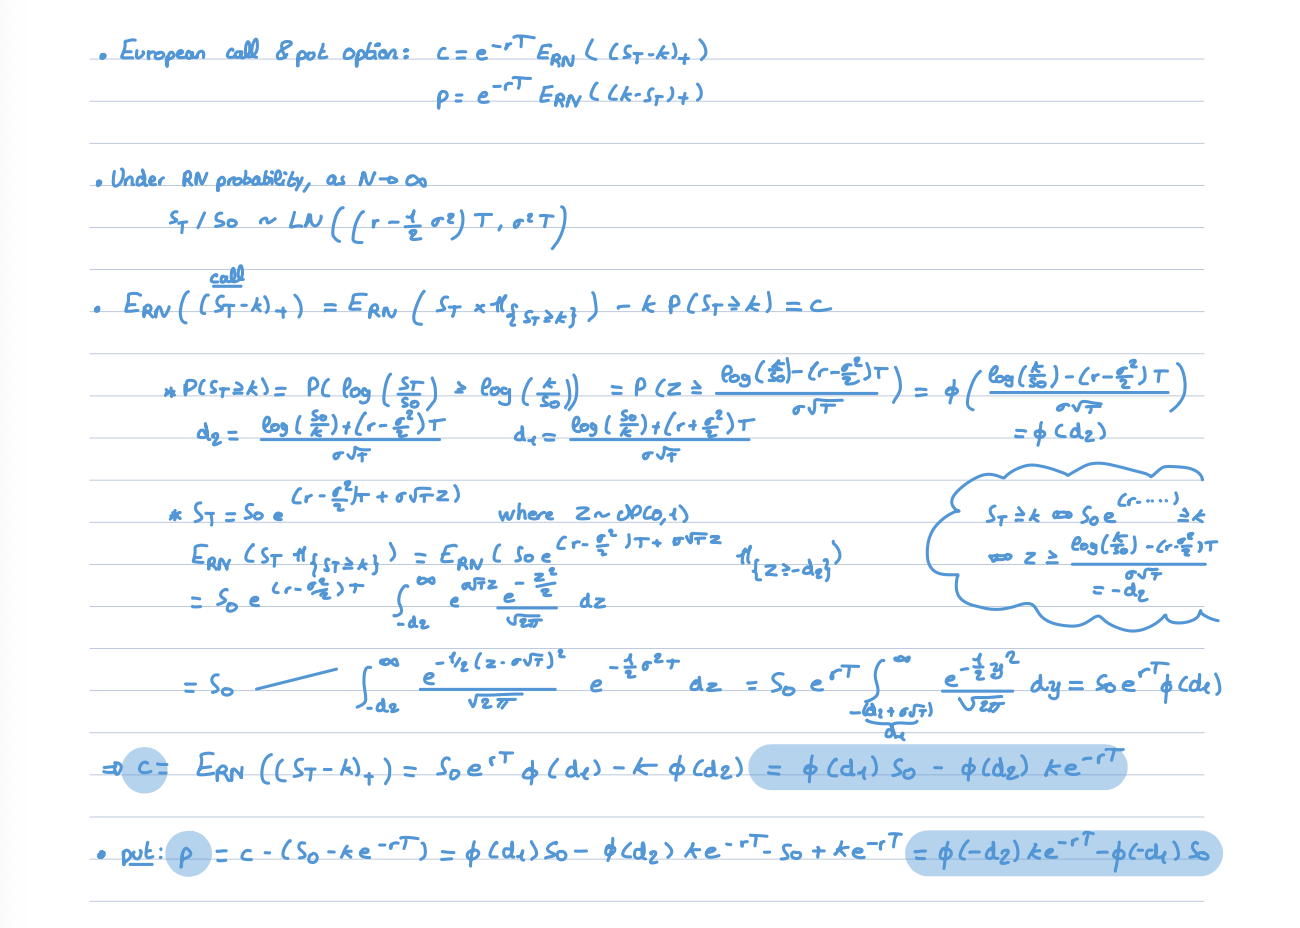

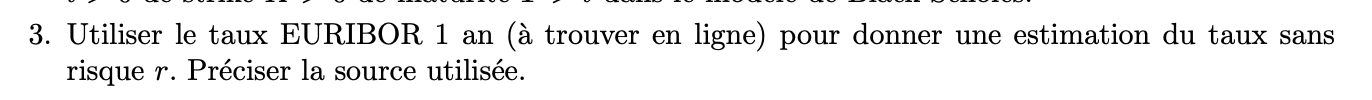

In [14]:
taux = pd.read_excel("../data/sujet6/QQQ euri2.0.xlsx",sheet_name="Euribor 12 M")
taux

,Date,PX_LAST,CHG_PCT_1D
0,2025-10-28,2.195,0.920
1,2025-10-27,2.175,0.741
2,2025-10-24,2.159,0.139
3,2025-10-23,2.156,0.000
4,2025-10-22,2.156,-0.046
...,...,...,...
250,2024-11-04,2.619,-0.380
251,2024-11-01,2.629,3.219
252,2024-10-31,2.547,-0.039
253,2024-10-30,2.548,-1.125


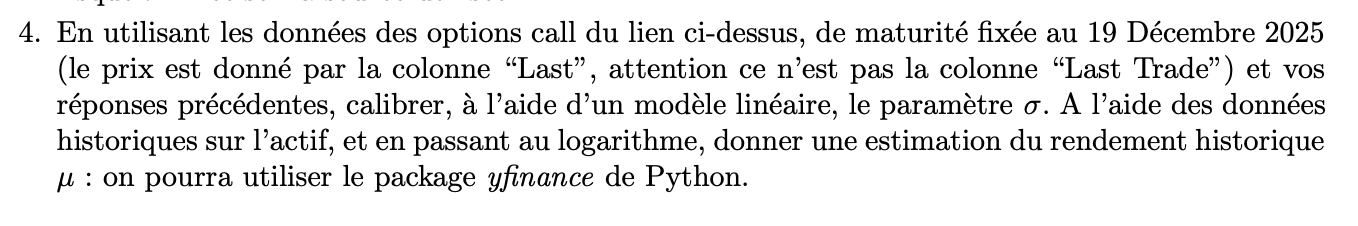

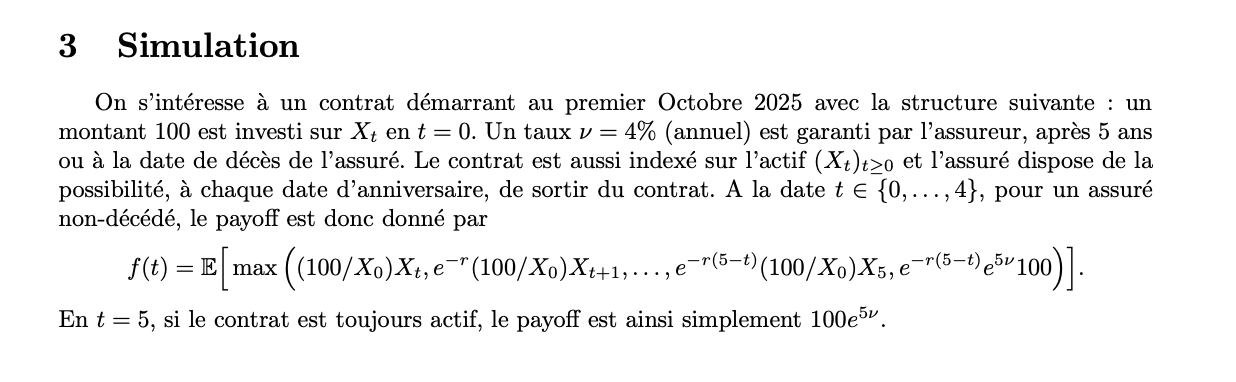

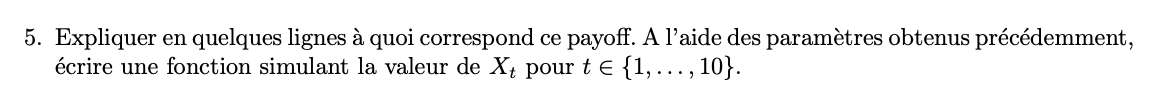

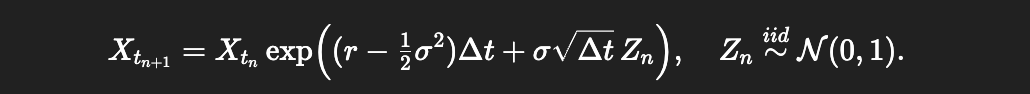

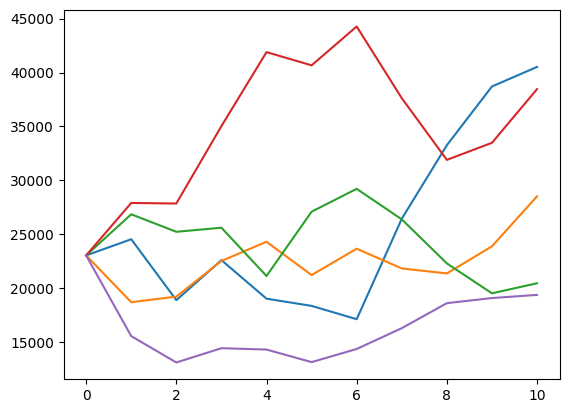

,path_1,path_2,path_3,path_4,path_5
t (years),,,,,
0,23053.992188,23053.992188,23053.992188,23053.992188,23053.992188
1,24553.705376,18719.888193,26863.914972,27914.238745,15576.970720
2,18910.470269,19238.773834,25242.701940,27862.969150,13134.651970
3,22616.372695,22542.182726,25620.914191,35031.795400,14456.136676
4,19046.319410,24320.756107,21147.415887,41888.999741,14333.481167
5,18377.577449,21232.061244,27104.529488,40666.308803,13167.340053
6,17143.925442,23675.718420,29223.569841,44265.895725,14385.247513
7,26449.704481,21845.872376,26395.358871,37622.314066,16313.944382
8,33266.529202,21382.559236,22314.761530,31906.821731,18630.873163


In [42]:

import numpy as np
import pandas as pd

def simulate_X_annual(X0, r, sigma, T=10, n_paths=1, seed=None):
    rng = np.random.default_rng(seed)
    X = np.empty((T+1, n_paths), dtype=float)
    X[0, :] = X0
    drift = r - 0.5 * sigma**2
    for t in range(T):
        Z = rng.standard_normal(size=n_paths)
        X[t+1, :] = X[t, :] * np.exp(drift + sigma * Z)
    idx = pd.Index(range(T+1), name="t (years)")
    cols = [f"path_{i+1}" for i in range(n_paths)]
    return pd.DataFrame(X, index=idx, columns=cols)

X0 = float(df_ixic["close"].iloc[-1])
r  = 0.0219         
sigma = np.log(df_ixic["close"]/df_ixic["close"].shift(1)).std()*252**0.5    # từ bước hiệu chỉnh options
paths = simulate_X_annual(X0, r, sigma, T=10, n_paths=5, seed=42)
plt.plot(paths.loc[0:1000])
plt.show()
paths

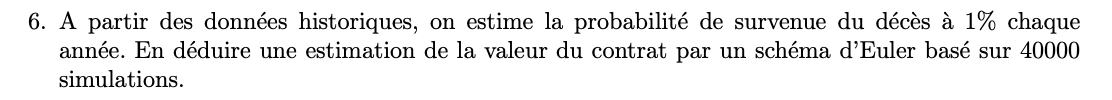

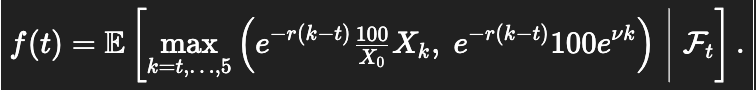

t<=5

In [73]:
def payoff_single_path(X, tau, r, nu):
    """
    X : array-like length 6: X[0]..X[5]
    tau : int in {0..6}
    r : risk-free rate
    nu : guaranteed growth rate
    """
    # Trường hợp tử vong
    if tau <= 5:
        return np.exp(-r * tau) * 100 * np.exp(nu * tau)

    # Trường hợp sống đến năm 5
    guarantee = np.exp(-r*5) * 100 * np.exp(5*nu)
    withdraws = [np.exp(-r*k) * (100/X[0]) * X[k] for k in range(6)]

    return max(max(withdraws), guarantee)

(array([  401.,     0.,   377.,     0.,   392.,     0.,   421.,     0.,
          394., 38015.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

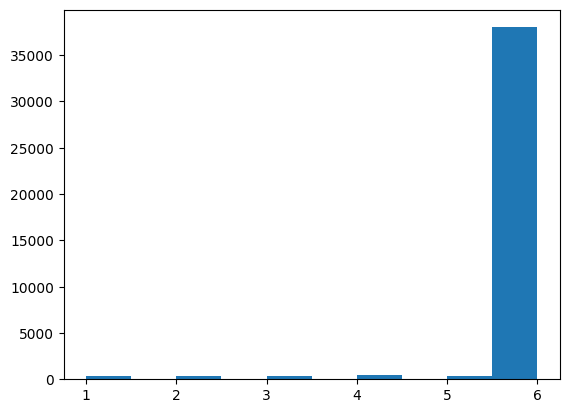

In [81]:
paths = simulate_X_annual(X0, r, sigma, T=5, n_paths=40000, seed=42)
scenario = paths.T.values
p = 0.01
G = np.clip(np.random.geometric(p, size=40000),0,6)
plt.hist(G)

In [84]:
vega=0.04
res =[]
for i in range(len(G)):
    res.append(payoff_single_path(scenario[i], G[i], r, vega))

In [83]:
np.mean(res)

130.03407281011224

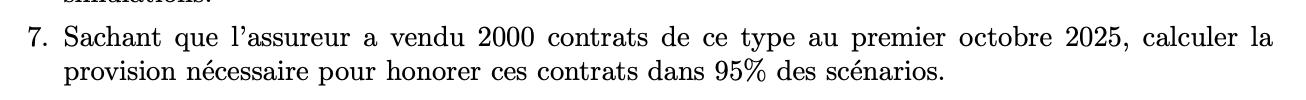

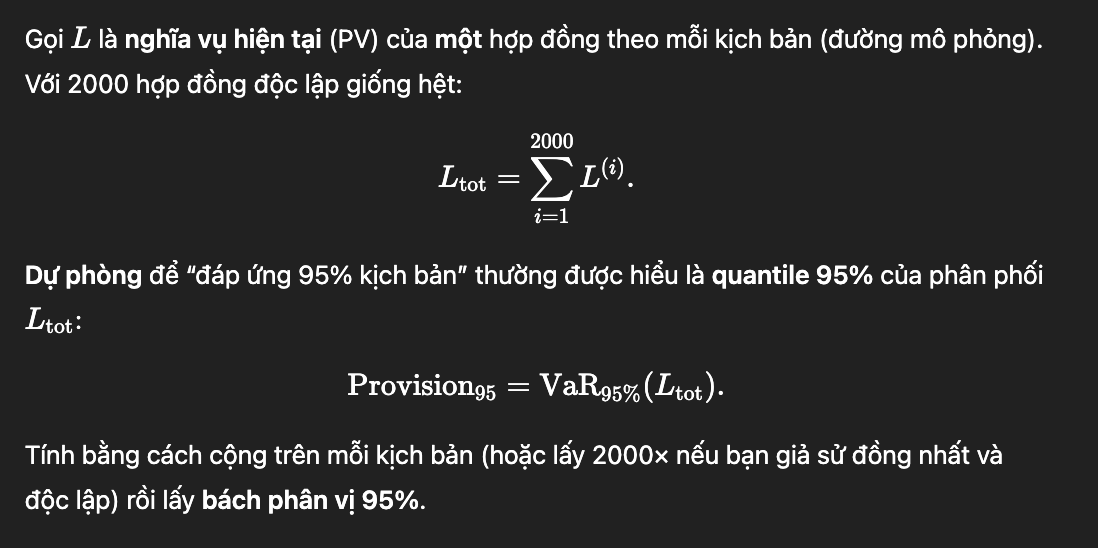

In [86]:

res = []
for j in range(1000):
    tmp =[]
    G = np.clip(np.random.geometric(p, size=2000),0,5)
    for i in range(len(G)):    
        tmp.append(payoff_single_path(scenario[i], G[i], r, vega))
    res.append(np.sum(tmp))

(array([  7.,  29.,  66., 128., 232., 238., 185.,  82.,  28.,   5.]),
 array([218414.84002397, 218444.06622735, 218473.29243072, 218502.5186341 ,
        218531.74483747, 218560.97104085, 218590.19724422, 218619.4234476 ,
        218648.64965097, 218677.87585435, 218707.10205773]),
 <BarContainer object of 10 artists>)

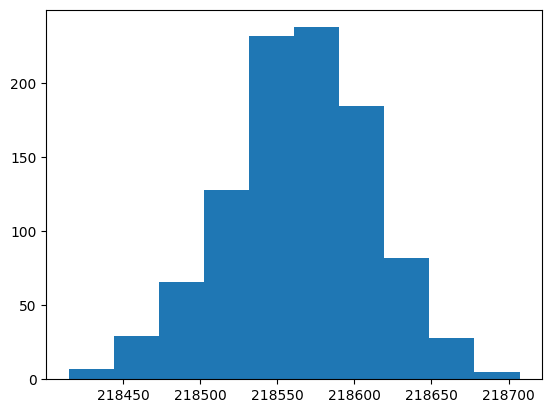

In [89]:
plt.hist(res)

In [87]:
np.quantile(res,0.95)

218639.30924845827

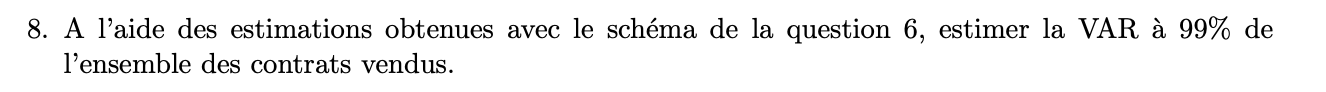

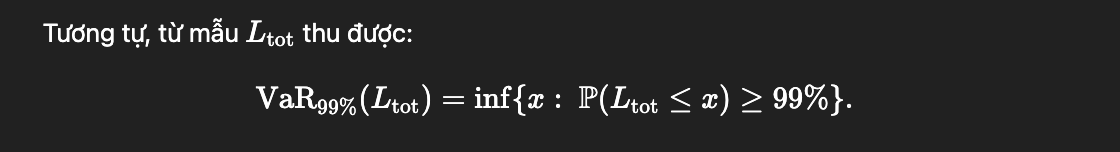

In [88]:
np.quantile(res,0.99)

218666.37494808956

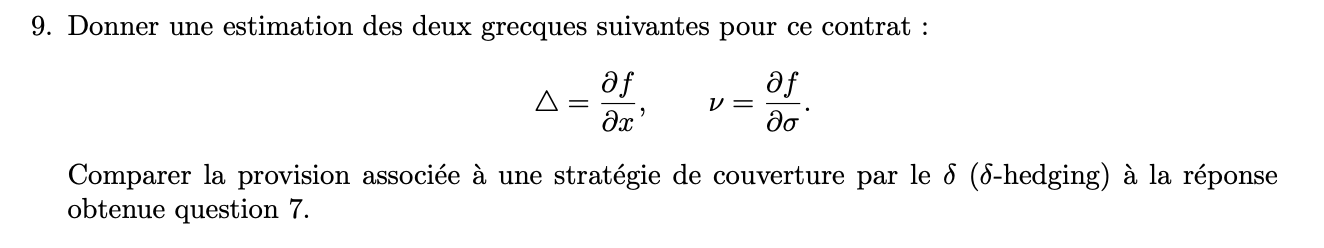

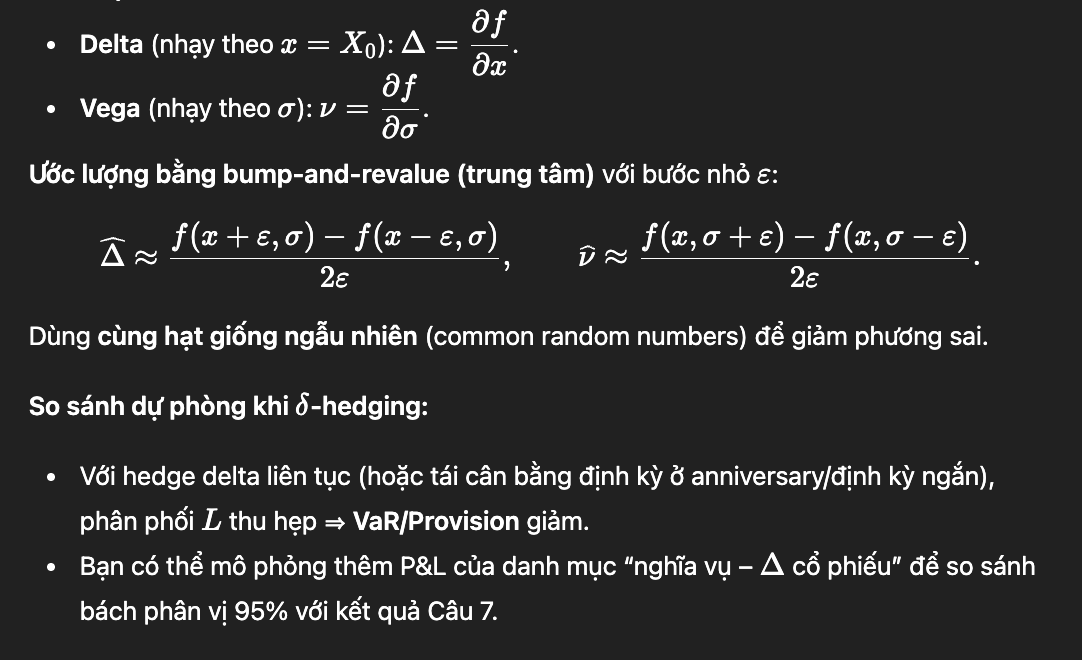